# 1 Regression linéaire multuple
-  1.1 Prediction de la consommation d'énergie avec LinearRegression()
-  1.2 Evalutaion du modèle

# 2 Grid Search CV
- Test de plusieurs algorithmes de regression avec la méthode GridSearchCV 

In [259]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.linear_model import LinearRegression, Ridge, Lasso, ElasticNet, RidgeCV, LassoCV
from sklearn.ensemble import RandomForestRegressor
from sklearn.dummy import DummyRegressor
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.preprocessing import StandardScaler, QuantileTransformer, MinMaxScaler
from sklearn.impute import KNNImputer
from sklearn.pipeline import Pipeline 
from sklearn.neighbors import KNeighborsRegressor
import xgboost as xg




In [260]:
data = pd.read_csv('Clenead/dataEDA_V2.csv') 

In [261]:
data

,year_built,number_buildings,number_floors,proprety_gfa_building,energy_star_score,site_energy_use_wn_kbtu,total_ghg_emissions,as_energy_star_score,steamuse_bin,electricity_bin,...,PrimaryPropertyType_retail store,PrimaryPropertyType_self-storage facility,PrimaryPropertyType_senior care community,PrimaryPropertyType_small- and mid-sized office,PrimaryPropertyType_supermarket / grocery store,PrimaryPropertyType_university,PrimaryPropertyType_warehouse,PrimaryPropertyType_worship facility,gfaperfloor,gfaperbuilding
0,1927,1.0,12,88434,60.0,7.456910e+06,249.98,0,1,1,...,0,0,0,0,0,0,0,0,7369.500000,88434.0
1,1996,1.0,11,88502,61.0,8.664479e+06,295.86,0,0,1,...,0,0,0,0,0,0,0,0,8045.636364,88502.0
2,1926,1.0,10,61320,56.0,6.946800e+06,286.43,0,1,1,...,0,0,0,0,0,0,0,0,6132.000000,61320.0
3,1980,1.0,18,113580,75.0,1.465650e+07,505.01,0,0,1,...,0,0,0,0,0,0,0,0,6310.000000,113580.0
4,1999,1.0,2,60090,NaN,1.258171e+07,301.81,1,0,1,...,0,0,0,0,0,0,0,0,30045.000000,60090.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1387,1990,1.0,1,12294,46.0,9.430032e+05,20.94,0,0,1,...,0,0,0,1,0,0,0,0,12294.000000,12294.0
1388,2004,1.0,1,16000,NaN,1.053706e+06,32.17,1,0,1,...,0,0,0,0,0,0,0,0,16000.000000,16000.0
1389,1974,1.0,1,13157,NaN,6.053764e+06,223.54,1,0,1,...,0,0,0,0,0,0,0,0,13157.000000,13157.0
1390,1989,1.0,1,14101,NaN,7.828413e+05,22.11,1,0,1,...,0,0,0,0,0,0,0,0,14101.000000,14101.0


In [262]:
data.columns

Index(['year_built', 'number_buildings', 'number_floors',
       'proprety_gfa_building', 'energy_star_score', 'site_energy_use_wn_kbtu',
       'total_ghg_emissions', 'as_energy_star_score', 'steamuse_bin',
       'electricity_bin', 'gaz_bin', 'proprety_gfa_parking_bin',
       'PrimaryPropertyType_distribution center', 'PrimaryPropertyType_hotel',
       'PrimaryPropertyType_k-12 school', 'PrimaryPropertyType_laboratory',
       'PrimaryPropertyType_large office',
       'PrimaryPropertyType_medical office',
       'PrimaryPropertyType_mixed use property', 'PrimaryPropertyType_other',
       'PrimaryPropertyType_refrigerated warehouse',
       'PrimaryPropertyType_residence hall', 'PrimaryPropertyType_restaurant',
       'PrimaryPropertyType_retail store',
       'PrimaryPropertyType_self-storage facility',
       'PrimaryPropertyType_senior care community',
       'PrimaryPropertyType_small- and mid-sized office',
       'PrimaryPropertyType_supermarket / grocery store',
       'Pri

## 1 Régression linéaire multiple

In [263]:
y = data.total_ghg_emissions
cols = ['site_energy_use_wn_kbtu',
        'total_ghg_emissions',
        'energy_star_score',
        'number_buildings',
        'number_floors',
        'proprety_gfa_building']
X = data.drop(columns=cols)
X

,year_built,as_energy_star_score,steamuse_bin,electricity_bin,gaz_bin,proprety_gfa_parking_bin,PrimaryPropertyType_distribution center,PrimaryPropertyType_hotel,PrimaryPropertyType_k-12 school,PrimaryPropertyType_laboratory,...,PrimaryPropertyType_retail store,PrimaryPropertyType_self-storage facility,PrimaryPropertyType_senior care community,PrimaryPropertyType_small- and mid-sized office,PrimaryPropertyType_supermarket / grocery store,PrimaryPropertyType_university,PrimaryPropertyType_warehouse,PrimaryPropertyType_worship facility,gfaperfloor,gfaperbuilding
0,1927,0,1,1,1,1,0,1,0,0,...,0,0,0,0,0,0,0,0,7369.500000,88434.0
1,1996,0,0,1,1,1,0,1,0,0,...,0,0,0,0,0,0,0,0,8045.636364,88502.0
2,1926,0,1,1,1,1,0,1,0,0,...,0,0,0,0,0,0,0,0,6132.000000,61320.0
3,1980,0,0,1,1,1,0,1,0,0,...,0,0,0,0,0,0,0,0,6310.000000,113580.0
4,1999,1,0,1,1,1,0,0,0,0,...,0,0,0,0,0,0,0,0,30045.000000,60090.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1387,1990,0,0,1,1,1,0,0,0,0,...,0,0,0,1,0,0,0,0,12294.000000,12294.0
1388,2004,1,0,1,1,1,0,0,0,0,...,0,0,0,0,0,0,0,0,16000.000000,16000.0
1389,1974,1,0,1,1,1,0,0,0,0,...,0,0,0,0,0,0,0,0,13157.000000,13157.0
1390,1989,1,0,1,1,1,0,0,0,0,...,0,0,0,0,0,0,0,0,14101.000000,14101.0


In [264]:
regression_alg = LinearRegression()

In [265]:
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.2)
std_scaled = StandardScaler().fit(X_train)
X_train_scaled = std_scaled.transform(X_train)
X_test_scaled = std_scaled.transform(X_test)

In [266]:
regression_alg.fit(X_train_scaled,y_train)

LinearRegression()

In [267]:
y_pred = regression_alg.predict(X_train_scaled)

In [268]:
regression_alg.intercept_, regression_alg.coef_

(73.46702863575047,
 array([ 2.17264566e+00,  4.38484458e+00,  2.27241757e+01, -1.42320562e+01,
         2.44184352e+01,  3.43882508e+12,  4.34007299e+13,  5.00127992e+13,
         7.29997376e+13,  1.05323591e+13,  6.23423171e+13,  3.38356558e+13,
         6.11709527e+13,  8.77003642e+13,  2.22720105e+13,  2.56825365e+13,
         2.34661254e+13,  5.87352660e+13,  3.68500501e+13,  2.34661254e+13,
         9.92046879e+13,  4.02743451e+13,  2.67190892e+13,  8.32161304e+13,
         5.34316384e+13,  9.24703194e+00,  2.57823901e+01]))

In [269]:
r2_score(y_train,y_pred)

0.5036882004594511

In [270]:
y_pred = regression_alg.predict(X_test_scaled)

In [271]:
r2_score(y_test,y_pred)

0.4377326447389638

## 1.2 Evaluation du modèle 

In [272]:
# Evaluation du modèle 


from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error, r2_score
import numpy as np

cols = ['site_energy_use_wn_kbtu',
        'total_ghg_emissions',
        'energy_star_score',
        'number_buildings',
        'number_floors',
        'proprety_gfa_building']
X = data.drop(columns=cols)
y = data['total_ghg_emissions']

def average_result(nb_run, X):
    average_rmse = 0
    average_r2 = 0
    for i_run in range(nb_run):
        X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)
        scaler = StandardScaler()
        X_train_scaled = scaler.fit_transform(X_train)
        X_test_scaled = scaler.transform(X_test)
        regression_alg = LinearRegression()
        regression_alg.fit(X_train_scaled, y_train)
        y_pred = regression_alg.predict(X_test_scaled)
        i_run_rmse = np.sqrt(mean_squared_error(y_test, y_pred))
        i_run_r2 = r2_score(y_test, y_pred)
        print(f"Run {i_run} : RMSE = {round(i_run_rmse,2)} - R2_score = {round(i_run_r2,2)} ")
        average_rmse += i_run_rmse
        average_r2 += i_run_r2
    return average_rmse / nb_run, average_r2 / nb_run

mean_rmse, mean_r2 = average_result(9, X)
print(f'moyenne du score RMSE = {mean_rmse}')
print(f'moyenne du score R2 = {mean_r2}')


Run 0 : RMSE = 69.44 - R2_score = 0.45 
Run 1 : RMSE = 26892995447761.67 - R2_score = -7.60240331623599e+22 
Run 2 : RMSE = 60.54 - R2_score = 0.33 
Run 3 : RMSE = 2959114973285.26 - R2_score = -7.934679839982934e+20 
Run 4 : RMSE = 59.49 - R2_score = 0.47 
Run 5 : RMSE = 65.11 - R2_score = 0.45 
Run 6 : RMSE = 53.47 - R2_score = 0.51 
Run 7 : RMSE = 354374551622815.4 - R2_score = -1.4327233737683317e+25 
Run 8 : RMSE = 70.2 - R2_score = 0.44 
moyenne du score RMSE = 42691851338248.95
moyenne du score R2 = -1.6004501376477417e+24


## Grid Search CV

#### Test de plusieurs algorithme de regressions avec Grid Search CV

- features (sans la variable energy star score): 

       - year_built
       - steamuse_bin
       - electricity_bin
       - gaz_bin
       - proprety_gfa_parking_bin
       - PrimaryPropertyType_distribution center
       - PrimaryPropertyType_hotel
       - PrimaryPropertyType_k-12 school
       - PrimaryPropertyType_laboratory
       - PrimaryPropertyType_large office
       - PrimaryPropertyType_medical office
       - PrimaryPropertyType_mixed use property
       - PrimaryPropertyType_other
       - PrimaryPropertyType_refrigerated warehouse
       - PrimaryPropertyType_residence hall
       - PrimaryPropertyType_restaurant
       - PrimaryPropertyType_retail store
       - PrimaryPropertyType_self-storage facility
       - PrimaryPropertyType_senior care community
       - PrimaryPropertyType_small- and mid-sized office
       - PrimaryPropertyType_supermarket / grocery store
       - PrimaryPropertyType_university
       - PrimaryPropertyType_warehouse
       - PrimaryPropertyType_worship facility
       - gfaperfloor
       - gfaperbuilding
       
- target : 'total_ghg_emissions'

- Le score obtenu est d'environ 41 % pour le test score

In [273]:
pipe = Pipeline([
                 ('scaled',StandardScaler()),
                 ('estimator',LinearRegression()),
                 ])

In [297]:
cols = ['site_energy_use_wn_kbtu',
        'total_ghg_emissions',
        'energy_star_score',
        'number_buildings',
        'number_floors',
        'proprety_gfa_building',
        'as_energy_star_score',
        ]

X = data.drop(columns=cols)
y = data['total_ghg_emissions']


In [298]:
X.isna().mean()

year_built                                         0.0
steamuse_bin                                       0.0
electricity_bin                                    0.0
gaz_bin                                            0.0
proprety_gfa_parking_bin                           0.0
PrimaryPropertyType_distribution center            0.0
PrimaryPropertyType_hotel                          0.0
PrimaryPropertyType_k-12 school                    0.0
PrimaryPropertyType_laboratory                     0.0
PrimaryPropertyType_large office                   0.0
PrimaryPropertyType_medical office                 0.0
PrimaryPropertyType_mixed use property             0.0
PrimaryPropertyType_other                          0.0
PrimaryPropertyType_refrigerated warehouse         0.0
PrimaryPropertyType_residence hall                 0.0
PrimaryPropertyType_restaurant                     0.0
PrimaryPropertyType_retail store                   0.0
PrimaryPropertyType_self-storage facility          0.0
PrimaryPro

In [299]:
X.columns

Index(['year_built', 'steamuse_bin', 'electricity_bin', 'gaz_bin',
       'proprety_gfa_parking_bin', 'PrimaryPropertyType_distribution center',
       'PrimaryPropertyType_hotel', 'PrimaryPropertyType_k-12 school',
       'PrimaryPropertyType_laboratory', 'PrimaryPropertyType_large office',
       'PrimaryPropertyType_medical office',
       'PrimaryPropertyType_mixed use property', 'PrimaryPropertyType_other',
       'PrimaryPropertyType_refrigerated warehouse',
       'PrimaryPropertyType_residence hall', 'PrimaryPropertyType_restaurant',
       'PrimaryPropertyType_retail store',
       'PrimaryPropertyType_self-storage facility',
       'PrimaryPropertyType_senior care community',
       'PrimaryPropertyType_small- and mid-sized office',
       'PrimaryPropertyType_supermarket / grocery store',
       'PrimaryPropertyType_university', 'PrimaryPropertyType_warehouse',
       'PrimaryPropertyType_worship facility', 'gfaperfloor',
       'gfaperbuilding'],
      dtype='object')

In [300]:

param_grid = {'scaled':[StandardScaler(),QuantileTransformer(),MinMaxScaler(),'passthrough'],
             'estimator':[LinearRegression(), 
                          RandomForestRegressor(), 
                          KNeighborsRegressor(),
                          DummyRegressor(),
                          ElasticNet(),
                          Ridge(),
                          Lasso(),
                          RidgeCV(),
                          LassoCV()]}
param_grid

{'scaled': [StandardScaler(),
  QuantileTransformer(),
  MinMaxScaler(),
  'passthrough'],
 'estimator': [LinearRegression(),
  RandomForestRegressor(),
  KNeighborsRegressor(),
  DummyRegressor(),
  ElasticNet(),
  Ridge(),
  Lasso(),
  RidgeCV(alphas=array([ 0.1,  1. , 10. ])),
  LassoCV()]}

In [301]:
grid = GridSearchCV(pipe,param_grid=param_grid, cv=5,return_train_score=True ,n_jobs=-1, verbose=1)

In [302]:
grid.fit(X_train,y_train)

Fitting 5 folds for each of 36 candidates, totalling 180 fits


GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('scaled', StandardScaler()),
                                       ('KNNImputer', KNNImputer()),
                                       ('estimator', LinearRegression())]),
             n_jobs=-1,
             param_grid={'estimator': [LinearRegression(),
                                       RandomForestRegressor(),
                                       KNeighborsRegressor(), DummyRegressor(),
                                       ElasticNet(), Ridge(), Lasso(),
                                       RidgeCV(alphas=array([ 0.1,  1. , 10. ])),
                                       LassoCV()],
                         'scaled': [StandardScaler(), QuantileTransformer(),
                                    MinMaxScaler(), 'passthrough']},
             return_train_score=True, verbose=1)

In [303]:
grid_cv = pd.DataFrame(grid.cv_results_)

new_cols = [i for i in grid_cv.columns if 'split' not in i.lower()]

grid_cv.loc[:,new_cols].sort_values('mean_test_score', ascending=False)

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_estimator,param_scaled,params,mean_test_score,std_test_score,rank_test_score,mean_train_score,std_train_score
2,0.054444,0.007810,0.021910,0.011379,LinearRegression(),MinMaxScaler(),"{'estimator': LinearRegression(), 'scaled': Mi...",0.348155,0.065407,1,0.416284,0.017974
30,0.061137,0.008021,0.016312,0.002370,"RidgeCV(alphas=array([ 0.1, 1. , 10. ]))",MinMaxScaler(),"{'estimator': RidgeCV(alphas=array([ 0.1, 1. ...",0.347182,0.067216,2,0.411167,0.018301
22,0.070954,0.017683,0.015801,0.002230,Ridge(),MinMaxScaler(),"{'estimator': Ridge(), 'scaled': MinMaxScaler()}",0.347182,0.067216,3,0.411167,0.018301
28,0.070260,0.006010,0.021513,0.007799,"RidgeCV(alphas=array([ 0.1, 1. , 10. ]))",StandardScaler(),"{'estimator': RidgeCV(alphas=array([ 0.1, 1. ...",0.346201,0.069462,4,0.413923,0.018225
32,0.182306,0.024792,0.016229,0.003613,LassoCV(),StandardScaler(),"{'estimator': LassoCV(), 'scaled': StandardSca...",0.345557,0.068679,5,0.411887,0.018574
24,0.058735,0.007021,0.016211,0.002324,Lasso(),StandardScaler(),"{'estimator': Lasso(), 'scaled': StandardScale...",0.345419,0.068259,6,0.411015,0.018338
20,0.068648,0.013635,0.027205,0.009317,Ridge(),StandardScaler(),"{'estimator': Ridge(), 'scaled': StandardScale...",0.345359,0.069864,7,0.414009,0.018227
0,0.067708,0.008704,0.016219,0.002783,LinearRegression(),StandardScaler(),"{'estimator': LinearRegression(), 'scaled': St...",0.345158,0.069813,8,0.414008,0.018230
23,0.065769,0.012945,0.015004,0.001900,Ridge(),passthrough,"{'estimator': Ridge(), 'scaled': 'passthrough'}",0.343820,0.069746,9,0.407956,0.018218
31,0.057949,0.004919,0.015200,0.004069,"RidgeCV(alphas=array([ 0.1, 1. , 10. ]))",passthrough,"{'estimator': RidgeCV(alphas=array([ 0.1, 1. ...",0.343799,0.069818,10,0.407956,0.018218


#### Test de plusieurs algorithme de regressions 

- features (avec la variable Energy Star) : 
       - year_built
       - energy_star_score
       - proprety_gfa_building
       - proprety_gfa_parking_bin
       - PrimaryPropertyType_distribution center
       - PrimaryPropertyType_hotel
       - PrimaryPropertyType_k-12 school
       - PrimaryPropertyType_laboratory
       - PrimaryPropertyType_large office
       - PrimaryPropertyType_medical office
       - PrimaryPropertyType_mixed use property
       - PrimaryPropertyType_other
       - PrimaryPropertyType_refrigerated warehouse
       - PrimaryPropertyType_residence hall
       - PrimaryPropertyType_restaurant
       - PrimaryPropertyType_retail store
       - PrimaryPropertyType_self-storage facility
       - PrimaryPropertyType_senior care community
       - PrimaryPropertyType_small- and mid-sized office
       - PrimaryPropertyType_supermarket / grocery store
       - PrimaryPropertyType_university
       - PrimaryPropertyType_warehouse
       - PrimaryPropertyType_worship facility
       - gfaperfloor
       - gfaperbuilding
       
- target : 'total_ghg_emissions'


- Le score obtenu est d'environ 43 % pour le test score

In [281]:
cols = ['total_ghg_emissions',
        'site_energy_use_wn_kbtu',
        'number_buildings',
        'number_floors',
        'proprety_gfa_building',
        'as_energy_star_score',
        'steamuse_bin',
        'electricity_bin',
        'gaz_bin',
        'proprety_gfa_parking_bin',
       ]

X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.3)


X = data.drop(columns=cols)
y = data['total_ghg_emissions']


In [282]:
X.columns

Index(['year_built', 'energy_star_score',
       'PrimaryPropertyType_distribution center', 'PrimaryPropertyType_hotel',
       'PrimaryPropertyType_k-12 school', 'PrimaryPropertyType_laboratory',
       'PrimaryPropertyType_large office',
       'PrimaryPropertyType_medical office',
       'PrimaryPropertyType_mixed use property', 'PrimaryPropertyType_other',
       'PrimaryPropertyType_refrigerated warehouse',
       'PrimaryPropertyType_residence hall', 'PrimaryPropertyType_restaurant',
       'PrimaryPropertyType_retail store',
       'PrimaryPropertyType_self-storage facility',
       'PrimaryPropertyType_senior care community',
       'PrimaryPropertyType_small- and mid-sized office',
       'PrimaryPropertyType_supermarket / grocery store',
       'PrimaryPropertyType_university', 'PrimaryPropertyType_warehouse',
       'PrimaryPropertyType_worship facility', 'gfaperfloor',
       'gfaperbuilding'],
      dtype='object')

In [283]:

pipe = Pipeline([
                 ('scaled',StandardScaler()),
                 ('KNNImputer', KNNImputer()),
                 ('estimator',LinearRegression())
                 ])

param_grid = {'scaled':[StandardScaler(),QuantileTransformer(),MinMaxScaler(),'passthrough'],
             'estimator':[LinearRegression(), 
                          RandomForestRegressor(), 
                          KNeighborsRegressor(),
                          DummyRegressor(),
                          ElasticNet(),
                          Ridge(),
                          Lasso(),
                          RidgeCV(),
                          LassoCV(),
                          xg.XGBRegressor(objective ='reg:linear')]}
param_grid

{'scaled': [StandardScaler(),
  QuantileTransformer(),
  MinMaxScaler(),
  'passthrough'],
 'estimator': [LinearRegression(),
  RandomForestRegressor(),
  KNeighborsRegressor(),
  DummyRegressor(),
  ElasticNet(),
  Ridge(),
  Lasso(),
  RidgeCV(alphas=array([ 0.1,  1. , 10. ])),
  LassoCV(),
  XGBRegressor(base_score=None, booster=None, callbacks=None,
               colsample_bylevel=None, colsample_bynode=None,
               colsample_bytree=None, early_stopping_rounds=None,
               enable_categorical=False, eval_metric=None, feature_types=None,
               gamma=None, gpu_id=None, grow_policy=None, importance_type=None,
               interaction_constraints=None, learning_rate=None, max_bin=None,
               max_cat_threshold=None, max_cat_to_onehot=None,
               max_delta_step=None, max_depth=None, max_leaves=None,
               min_child_weight=None, missing=nan, monotone_constraints=None,
               n_estimators=100, n_jobs=None, num_parallel_tree=None

In [284]:
grid = GridSearchCV(pipe,param_grid=param_grid, cv=5,return_train_score=True ,n_jobs=-1, verbose=1)

In [285]:
grid.fit(X_train,y_train)

Fitting 5 folds for each of 40 candidates, totalling 200 fits


GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('scaled', StandardScaler()),
                                       ('KNNImputer', KNNImputer()),
                                       ('estimator', LinearRegression())]),
             n_jobs=-1,
             param_grid={'estimator': [LinearRegression(),
                                       RandomForestRegressor(),
                                       KNeighborsRegressor(), DummyRegressor(),
                                       ElasticNet(), Ridge(), Lasso(),
                                       RidgeCV(alphas=array([ 0.1,  1. , 10. ])),
                                       LassoCV(),
                                       XGBRegressor(base_score...
                                                    max_cat_threshold=None,
                                                    max_cat_to_onehot=None,
                                                    max_delta_step=None,
                                              

In [286]:
grid_cv = pd.DataFrame(grid.cv_results_)

new_cols = [i for i in grid_cv.columns if 'split' not in i.lower()]

grid_cv.loc[:,new_cols].sort_values('mean_test_score', ascending=False)

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_estimator,param_scaled,params,mean_test_score,std_test_score,rank_test_score,mean_train_score,std_train_score
7,0.781064,0.062508,0.026800,0.003429,RandomForestRegressor(),passthrough,"{'estimator': RandomForestRegressor(), 'scaled...",0.447941,0.079715,1,0.920130,0.002777
6,0.761643,0.066156,0.025420,0.004196,RandomForestRegressor(),MinMaxScaler(),"{'estimator': RandomForestRegressor(), 'scaled...",0.442834,0.103569,2,0.919227,0.004277
5,0.886015,0.089720,0.025797,0.001166,RandomForestRegressor(),QuantileTransformer(),"{'estimator': RandomForestRegressor(), 'scaled...",0.442482,0.080326,3,0.920429,0.003358
4,0.740389,0.051061,0.025213,0.003781,RandomForestRegressor(),StandardScaler(),"{'estimator': RandomForestRegressor(), 'scaled...",0.437992,0.091249,4,0.920173,0.003802
31,0.010406,0.001847,0.003595,0.000484,"RidgeCV(alphas=array([ 0.1, 1. , 10. ]))",passthrough,"{'estimator': RidgeCV(alphas=array([ 0.1, 1. ...",0.422270,0.063843,5,0.508596,0.013619
23,0.012108,0.008467,0.003600,0.000801,Ridge(),passthrough,"{'estimator': Ridge(), 'scaled': 'passthrough'}",0.422136,0.063836,6,0.508597,0.013619
30,0.009801,0.000747,0.004799,0.002133,"RidgeCV(alphas=array([ 0.1, 1. , 10. ]))",MinMaxScaler(),"{'estimator': RidgeCV(alphas=array([ 0.1, 1. ...",0.416921,0.071164,7,0.506456,0.013994
22,0.011803,0.005155,0.003105,0.000209,Ridge(),MinMaxScaler(),"{'estimator': Ridge(), 'scaled': MinMaxScaler()}",0.416921,0.071164,8,0.506456,0.013994
34,0.147290,0.018253,0.003503,0.000448,LassoCV(),MinMaxScaler(),"{'estimator': LassoCV(), 'scaled': MinMaxScale...",0.414853,0.065664,9,0.513247,0.017183
24,0.008910,0.001109,0.003506,0.000450,Lasso(),StandardScaler(),"{'estimator': Lasso(), 'scaled': StandardScale...",0.414485,0.055328,10,0.514069,0.014034


In [304]:

X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.3)

pipe = Pipeline([
                 ('scaled',StandardScaler()),
                 ('KNNImputer', KNNImputer()),
                 ('estimator',LinearRegression())
                 ])

param_grid = {'scaled':[StandardScaler(),QuantileTransformer(),MinMaxScaler(),'passthrough'],
             'estimator':[RandomForestRegressor()],
             'estimator__n_estimators' : [50,100,150,200,300]}
param_grid

grid = GridSearchCV(pipe,param_grid=param_grid, cv=5,return_train_score=True ,n_jobs=-1, verbose=1)

grid.fit(X_train,y_train)

grid_cv = pd.DataFrame(grid.cv_results_)

new_cols = [i for i in grid_cv.columns if 'split' not in i.lower()]

grid_cv.loc[:,new_cols].sort_values('mean_test_score', ascending=False)

Fitting 5 folds for each of 20 candidates, totalling 100 fits


,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_estimator,param_estimator__n_estimators,param_scaled,params,mean_test_score,std_test_score,rank_test_score,mean_train_score,std_train_score
11,1.114147,0.046521,0.033718,0.004137,RandomForestRegressor(n_estimators=150),150,passthrough,{'estimator': RandomForestRegressor(n_estimato...,0.412816,0.072491,1,0.918906,0.004916
16,2.482784,0.293622,0.083723,0.021051,RandomForestRegressor(n_estimators=150),300,StandardScaler(),{'estimator': RandomForestRegressor(n_estimato...,0.411370,0.077957,2,0.921407,0.003033
17,2.182317,0.017423,0.064327,0.005120,RandomForestRegressor(n_estimators=150),300,QuantileTransformer(),{'estimator': RandomForestRegressor(n_estimato...,0.410869,0.070824,3,0.920235,0.003117
14,1.423276,0.047077,0.041509,0.001555,RandomForestRegressor(n_estimators=150),200,MinMaxScaler(),{'estimator': RandomForestRegressor(n_estimato...,0.410119,0.076433,4,0.918255,0.006174
18,2.297665,0.206830,0.062415,0.003604,RandomForestRegressor(n_estimators=150),300,MinMaxScaler(),{'estimator': RandomForestRegressor(n_estimato...,0.409983,0.073794,5,0.920802,0.003634
12,1.483450,0.083046,0.048714,0.007380,RandomForestRegressor(n_estimators=150),200,StandardScaler(),{'estimator': RandomForestRegressor(n_estimato...,0.407387,0.075462,6,0.919460,0.004638
19,2.117429,0.057632,0.062228,0.006744,RandomForestRegressor(n_estimators=150),300,passthrough,{'estimator': RandomForestRegressor(n_estimato...,0.406956,0.080018,7,0.920777,0.002730
3,0.372914,0.057216,0.015201,0.003917,RandomForestRegressor(n_estimators=150),50,passthrough,{'estimator': RandomForestRegressor(n_estimato...,0.406141,0.084135,8,0.913396,0.005127
13,1.535914,0.100382,0.048807,0.008976,RandomForestRegressor(n_estimators=150),200,QuantileTransformer(),{'estimator': RandomForestRegressor(n_estimato...,0.405415,0.080743,9,0.918926,0.003749
1,0.430145,0.041995,0.016208,0.002418,RandomForestRegressor(n_estimators=150),50,QuantileTransformer(),{'estimator': RandomForestRegressor(n_estimato...,0.404767,0.077979,10,0.912684,0.005309


In [288]:
bestmodel = grid.best_estimator_
bestmodel


Pipeline(steps=[('scaled', 'passthrough'), ('KNNImputer', KNNImputer()),
                ('estimator', RandomForestRegressor(n_estimators=150))])

In [289]:
best_estimator = bestmodel["estimator"]
best_estimator

RandomForestRegressor(n_estimators=150)

In [290]:
importance = best_estimator.feature_importances_
importance

array([1.11624159e-01, 1.29212824e-01, 1.88432189e-03, 6.79173084e-02,
       1.52219599e-02, 4.94284636e-03, 1.20168630e-02, 5.59718428e-04,
       7.02636651e-03, 2.97970247e-02, 1.73242590e-04, 1.15383060e-03,
       3.43337757e-02, 9.88100011e-03, 1.34082370e-03, 1.46992831e-02,
       5.15397990e-03, 6.80182696e-02, 1.19419068e-02, 1.18893581e-02,
       2.97534467e-03, 1.68641928e-01, 2.89593865e-01])

In [291]:
importance = pd.Series(importance, index=X_train.columns).round(2).sort_values(ascending=False)
importance

gfaperbuilding                                     0.29
gfaperfloor                                        0.17
energy_star_score                                  0.13
year_built                                         0.11
PrimaryPropertyType_supermarket / grocery store    0.07
PrimaryPropertyType_hotel                          0.07
PrimaryPropertyType_other                          0.03
PrimaryPropertyType_restaurant                     0.03
PrimaryPropertyType_k-12 school                    0.02
PrimaryPropertyType_senior care community          0.01
PrimaryPropertyType_warehouse                      0.01
PrimaryPropertyType_university                     0.01
PrimaryPropertyType_small- and mid-sized office    0.01
PrimaryPropertyType_retail store                   0.01
PrimaryPropertyType_mixed use property             0.01
PrimaryPropertyType_large office                   0.01
PrimaryPropertyType_self-storage facility          0.00
PrimaryPropertyType_laboratory                  

In [292]:
dt = pd.DataFrame(importance).T
df = {"cols":X_train.columns, 'importances':importance}
df

{'cols': Index(['year_built', 'energy_star_score',
        'PrimaryPropertyType_distribution center', 'PrimaryPropertyType_hotel',
        'PrimaryPropertyType_k-12 school', 'PrimaryPropertyType_laboratory',
        'PrimaryPropertyType_large office',
        'PrimaryPropertyType_medical office',
        'PrimaryPropertyType_mixed use property', 'PrimaryPropertyType_other',
        'PrimaryPropertyType_refrigerated warehouse',
        'PrimaryPropertyType_residence hall', 'PrimaryPropertyType_restaurant',
        'PrimaryPropertyType_retail store',
        'PrimaryPropertyType_self-storage facility',
        'PrimaryPropertyType_senior care community',
        'PrimaryPropertyType_small- and mid-sized office',
        'PrimaryPropertyType_supermarket / grocery store',
        'PrimaryPropertyType_university', 'PrimaryPropertyType_warehouse',
        'PrimaryPropertyType_worship facility', 'gfaperfloor',
        'gfaperbuilding'],
       dtype='object'),
 'importances': gfaperbuilding  

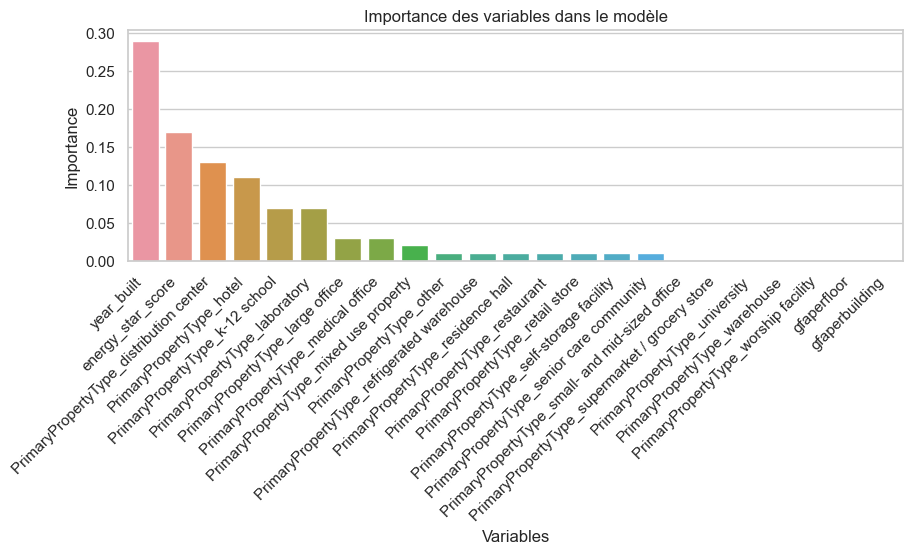

In [293]:
sns.set(style='whitegrid')
fig, ax = plt.subplots(figsize=(10, 3))
sns.barplot(data= df,x='cols', y='importances', ax=ax)

# Mise en oblique des étiquettes
plt.xticks(rotation=45, ha='right')

# Titre et axes
plt.title("Importance des variables dans le modèle")
plt.xlabel("Variables")
plt.ylabel("Importance")

plt.show()

on veut estimer l'inpotance de l'énergie star score
